In [93]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [6]:
data = pd.read_csv('datset.csv')
data.shape

(200, 4)

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


**We can see that, TV and Sales are highly correlated**
> Consider these two columns

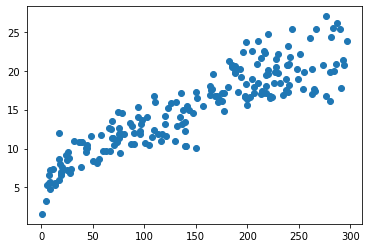

In [44]:
#data.plot(x='TV',y='Sales',kind='scatter');
plt.scatter(x=data['TV'],y=data['Sales']);

**We can see a linear trend here. We will try to fit a line which represents the relation between TV and sales.**

For doing that we can use Linear regression form sklearn.

In [19]:
LinReg = LinearRegression()
LinReg.fit(data[['TV']],data[['Sales']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**We will create the line using the y intercept and the slope**

In [22]:
c = LinReg.intercept_

In [23]:
m = LinReg.coef_

In [50]:
min_x = data[['TV']].min()-20
max_x = data[['TV']].max()+20

In [51]:
x = np.linspace(min_x,max_x,10)
y = c + m*x

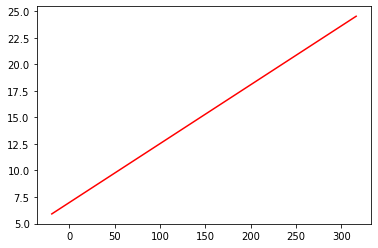

In [52]:
plt.plot(x, y, color='red', label='Regression Line');

**Let's see the data points and the regression line together**

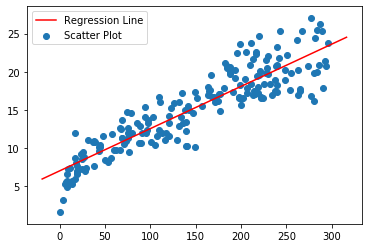

In [55]:
plt.plot(x, y, color='red', label='Regression Line')
plt.scatter(x=data['TV'],y=data['Sales'],label='Scatter Plot')
plt.legend()
plt.show()

We can see this for other columns too.

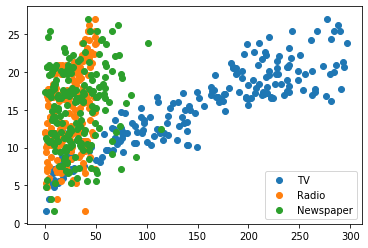

In [56]:
#plt.plot(x, y, color='red', label='Regression Line')
for i in ['TV','Radio','Newspaper']:
    plt.scatter(x=data[i],y=data['Sales'],label=i)
plt.legend()
plt.show()

**We can consider all the columns for finding our regeression line for the Sales.**

In [57]:
LinReg = LinearRegression()
LinReg.fit(data[['TV','Radio','Newspaper']],data[['Sales']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
y = LinReg.intercept_ + LinReg.coef_*x

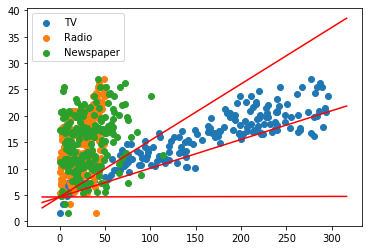

In [71]:
plt.plot(x, y, color='red')
for i in ['TV','Radio','Newspaper']:
    plt.scatter(x=data[i],y=data['Sales'],label=i)
plt.legend()
plt.show()

**Prediction for the sales column using Linear Regression**

In [72]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [258]:
X_trn,X_test,y_trn,y_test = train_test_split(data[['TV','Radio','Newspaper']],data[['Sales']],test_size=0.3,random_state=63)

In [259]:
X_trn.shape

(140, 3)

In [260]:
LinReg.fit(X_trn,y_trn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [261]:
y_pred = LinReg.predict(X_test)

In [262]:
y_pred.shape,y_test.shape

((60, 1), (60, 1))

**To evaluate our model, we can use mean squared error and R2 Score**

In [263]:
mean_squared_error(y_test,y_pred)

2.4619878420818764

In [264]:
r2_score(y_test,y_pred)

0.8794432010184271

**R2 score will tell us how close the data is fitting with the regression line. Closer the R2 score to 1, better our model**